Helper notebook to run "FitDiagnostics" to extract post-fit shapes

In [1]:
# settings

year = "" # not used
channel = "total" # options are mu, ele and total
spinpostfix = "" # options are "" and "_Spin32"
masspoint = "1200" # should not matter as we are only looking at B-only fit!
region = "SR"

datacard = "../cards_combined/" + masspoint + "_pt_ST_" + channel + "_" + region + spinpostfix + ".dat"

In [2]:
command = "combine -M FitDiagnostics {} --saveShapes --saveWithUncertainties --robustFit=1 --robustHesse 1 --cminDefaultMinimizerStrategy 0 --plots".format(datacard)

print("Please execute the following command:")
print(command)
print("Then copy the resulting root file to somewhere!")
print("You can add the --skipSBFit option to only run the fit with signal!")

Please execute the following command:
combine -M FitDiagnostics ../cards_combined/1200_pt_ST_total_SR.dat --saveShapes --saveWithUncertainties --robustFit=1 --robustHesse 1 --cminDefaultMinimizerStrategy 0 --plots
Then copy the resulting root file to somewhere!
You can add the --skipSBFit option to only run the fit with signal!


In [3]:
# plotting the covariance matric
import uproot
import numpy as np
with uproot.open("workdir_postfit/fitDiagnosticsTest.root") as upfile:
    
    hist = upfile["covariance_fit_b"]
    
histdata = hist.values()
hist_labels_x = hist.axis("x").labels()
hist_labels_y = np.flip(hist_labels_x)
ticks = range(len(hist_labels_x))

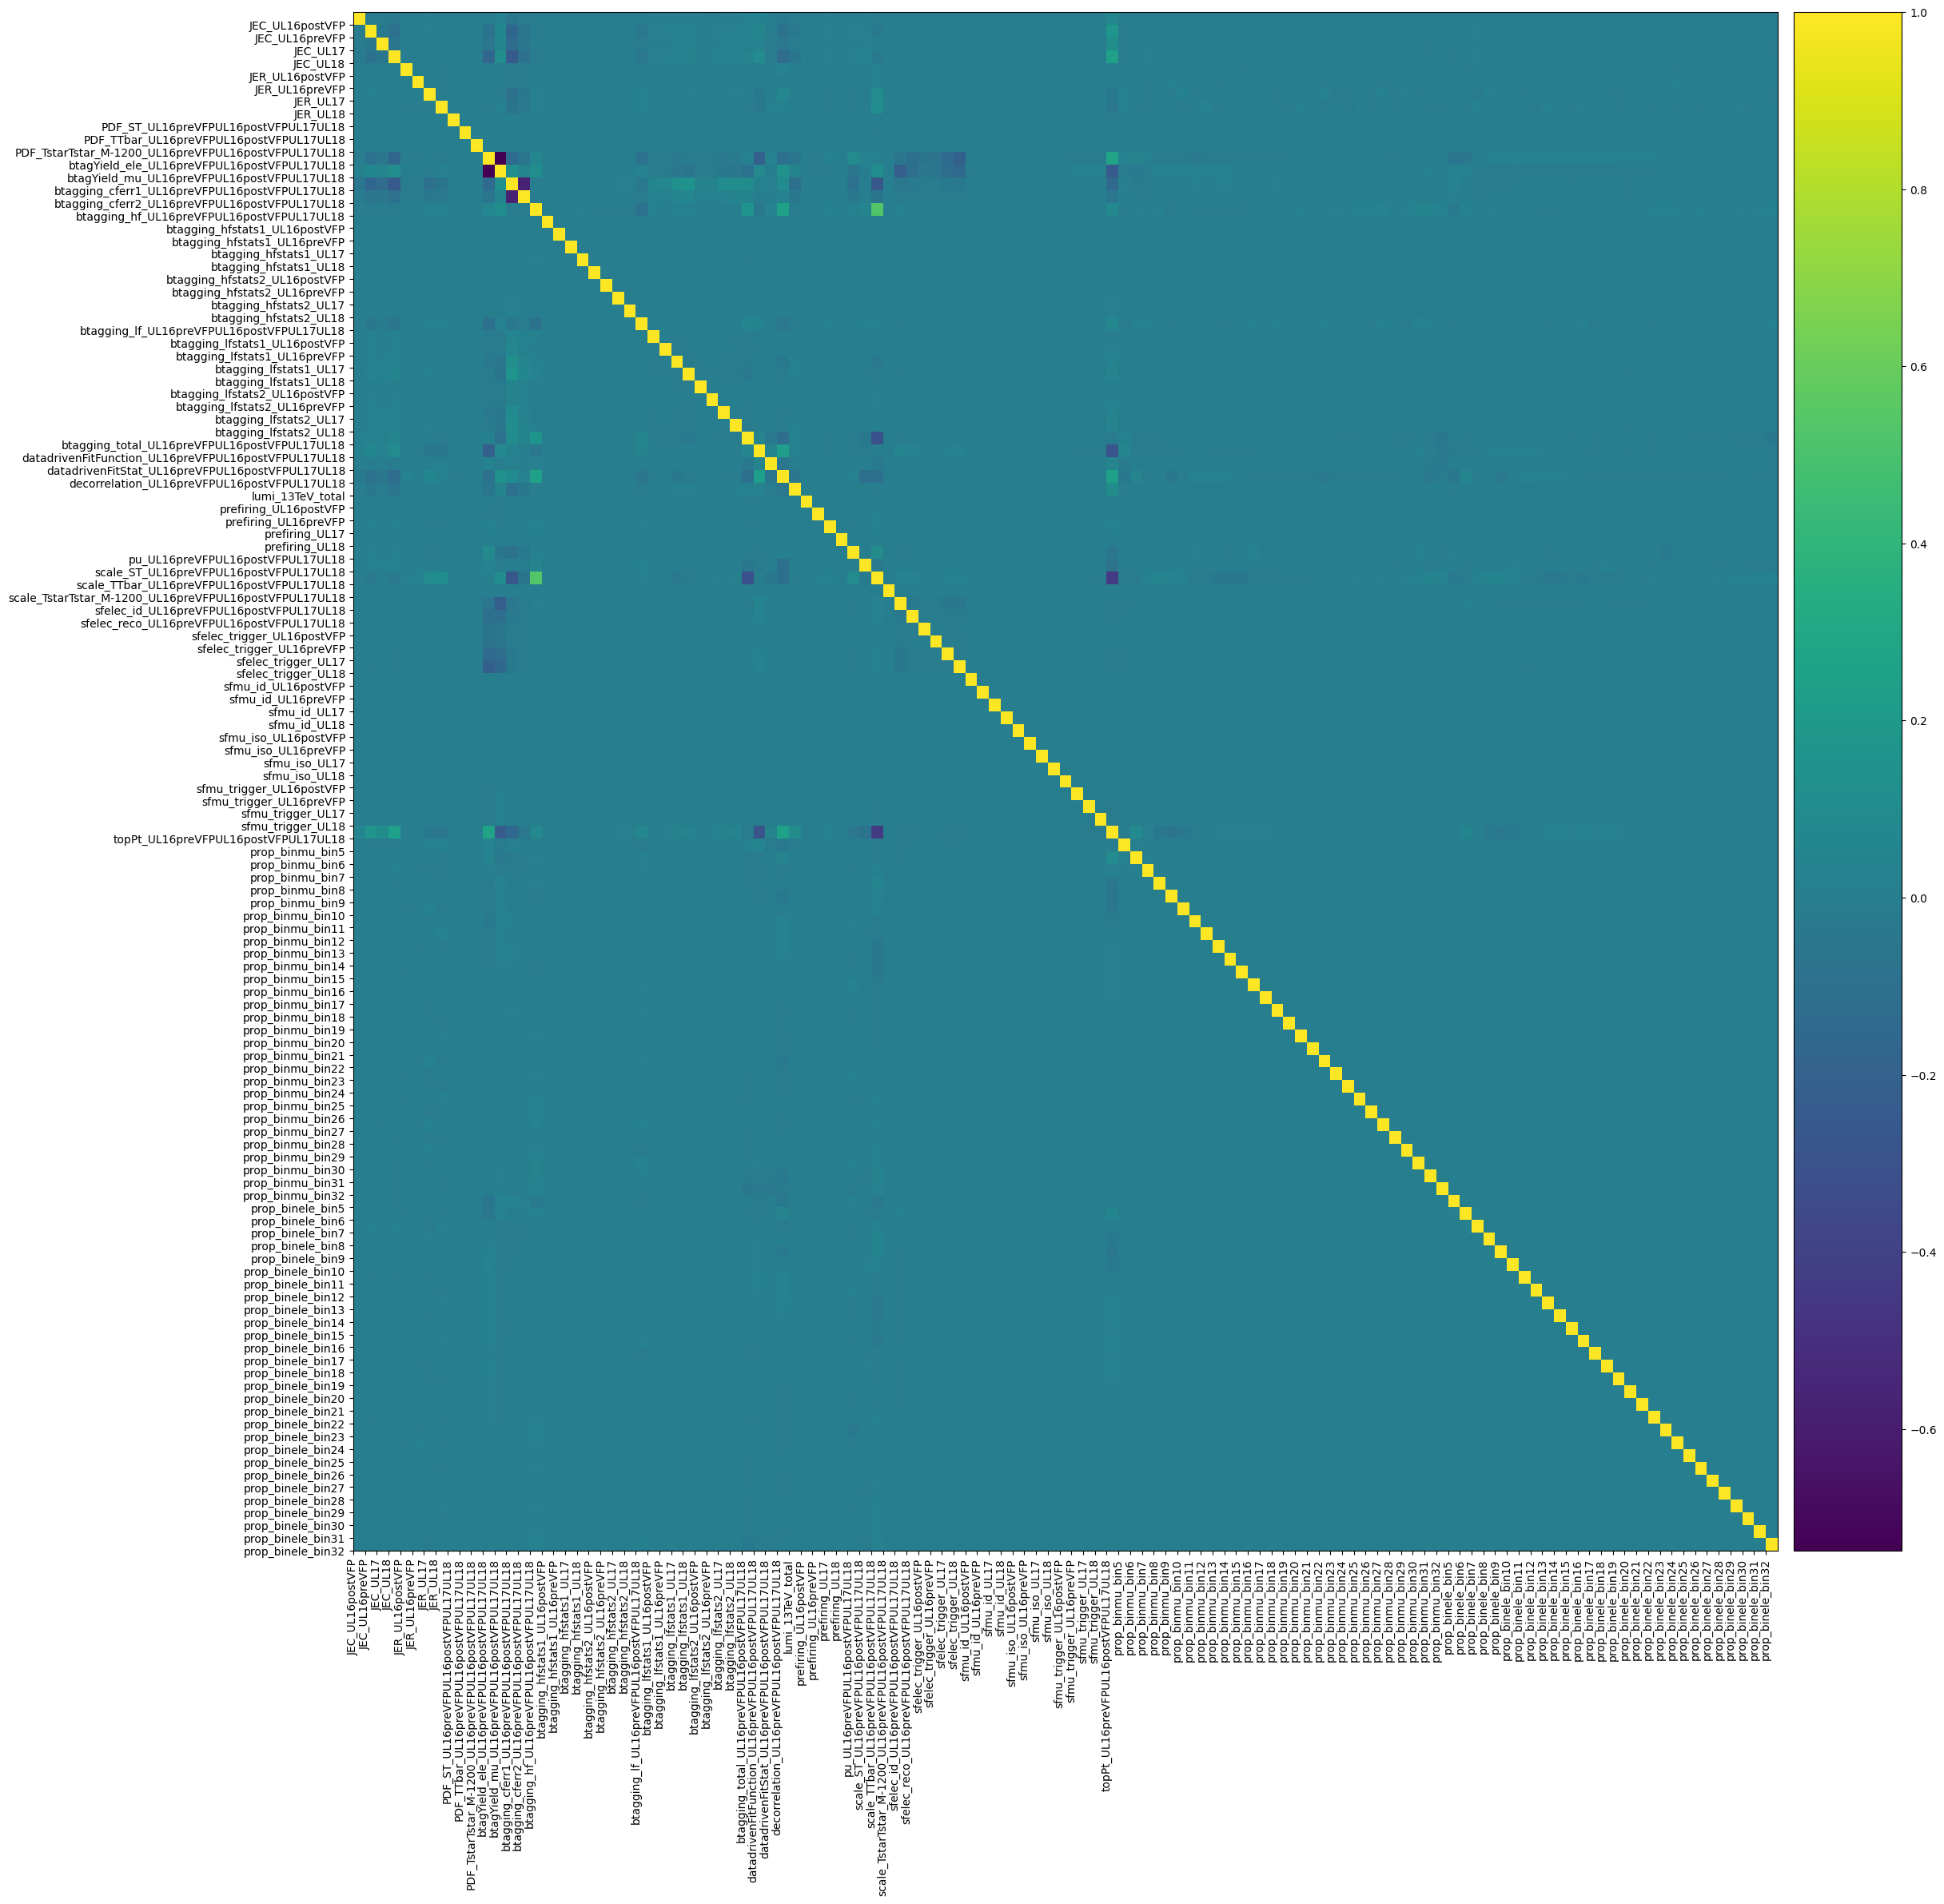

In [4]:
import matplotlib.pyplot as plt
import mplhep as hep

f = plt.figure(figsize=(25, 25))

hep.hist2dplot(histdata)

plt.xticks(ticks, hist_labels_x, rotation=90)
plt.yticks(ticks, hist_labels_y)

plt.show()

In [5]:
# finding the high correlations
threshold = 0.5

for ix, iy in np.ndindex(histdata.shape):
    if histdata[ix, iy] > threshold and (not hist_labels_x[ix] == hist_labels_y[iy]):
        print(f"{hist_labels_x[ix]} and {hist_labels_y[iy]}: {histdata[ix, iy]}")

btagging_hf_UL16preVFPUL16postVFPUL17UL18 and scale_TTbar_UL16preVFPUL16postVFPUL17UL18: 0.5278696734790395
scale_TTbar_UL16preVFPUL16postVFPUL17UL18 and btagging_hf_UL16preVFPUL16postVFPUL17UL18: 0.5278696734790395
